# Import Required Libraries.

In [131]:
import pandas as pd
import numpy as np
import seaborn as sn
import datetime
import matplotlib
import matplotlib.pyplot as plt

# Import CSV file and preview data.

In [132]:
survey_data = pd.read_csv('provider_appt_final.csv')

# Print columns and remove white space, if any.

In [133]:
# print column names to remove white space, if any.

list(survey_data.columns)

['NPI',
 'First_Name',
 'Last_Name',
 'License_Number',
 'Network',
 'Address',
 'City',
 'County',
 'State',
 'Zip_Code ',
 'Phone_Number',
 'Fax_Number',
 'Specialty ',
 'Date_Survey',
 'Time_Survey',
 'Urgent_Appointment_Date ',
 'Urgent_Appointment_Time',
 'Non_Urgent_Appointment_Date',
 ' Non_Urgent_Appointment_Time']

In [134]:
# Remove column header white spaces.
survey_data.columns = survey_data.columns.str.strip()

In [135]:
# Checking column name. Can delete this line later.
list(survey_data.columns)

['NPI',
 'First_Name',
 'Last_Name',
 'License_Number',
 'Network',
 'Address',
 'City',
 'County',
 'State',
 'Zip_Code',
 'Phone_Number',
 'Fax_Number',
 'Specialty',
 'Date_Survey',
 'Time_Survey',
 'Urgent_Appointment_Date',
 'Urgent_Appointment_Time',
 'Non_Urgent_Appointment_Date',
 'Non_Urgent_Appointment_Time']

# Data formatting and cleaning.

In [136]:
survey_data.head()

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,Phone_Number,Fax_Number,Specialty,Date_Survey,Time_Survey,Urgent_Appointment_Date,Urgent_Appointment_Time,Non_Urgent_Appointment_Date,Non_Urgent_Appointment_Time
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,2708870100,2708831000,Internal Medicine,3/3/22,8:00 AM,3/7/22,1:00 PM,4/18/22,8:45 AM
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,2707264011,2707242300,General Practice,2/18/22,2:30 PM,3/4/22,1:30 PM,4/4/22,7:00 AM
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,2702421100,2702481212,Pediatrics,2/18/22,10:30 AM,3/16/22,7:00 AM,4/13/22,1:00 PM
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,2707371212,2707342511,General Practice,2/21/22,7:30 AM,3/15/22,4:00 PM,3/22/22,8:00 AM
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,2708255100,2708297441,Pediatrics,3/11/22,2:00 PM,3/15/22,3:00 PM,3/28/22,8:45 AM


In [137]:
# Check data types

print(type(survey_data.Date_Survey[0]))
print(type(survey_data.Time_Survey[0]))
print(type(survey_data.Urgent_Appointment_Date[0]))
print(type(survey_data.Urgent_Appointment_Time[0]))
print(type(survey_data.Non_Urgent_Appointment_Date[0]))
print(type(survey_data.Non_Urgent_Appointment_Time[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [138]:
# convert the date_str and time_str columns to datetime format
survey_data['Survey_Date'] = pd.to_datetime(survey_data['Date_Survey'])
survey_data['Survey_Time'] = pd.to_datetime(survey_data['Time_Survey']).dt.time

survey_data['Urg_Appt_Date'] = pd.to_datetime(survey_data['Urgent_Appointment_Date'])
survey_data['Urg_Appt_Time'] = pd.to_datetime(survey_data['Urgent_Appointment_Time']).dt.time

survey_data['Non_Urg_Appt_Date'] = pd.to_datetime(survey_data['Non_Urgent_Appointment_Date'])
survey_data['Non_Urg_Appt_Time'] = pd.to_datetime(survey_data['Non_Urgent_Appointment_Time']).dt.time

# drop the original date and time columns
survey_data.drop('Date_Survey', axis=1, inplace=True)
survey_data.drop('Time_Survey', axis=1, inplace=True)

survey_data.drop('Urgent_Appointment_Date', axis=1, inplace=True)
survey_data.drop('Urgent_Appointment_Time', axis=1, inplace=True)

survey_data.drop('Non_Urgent_Appointment_Date', axis=1, inplace=True)
survey_data.drop('Non_Urgent_Appointment_Time', axis=1, inplace=True)

# print the updated dataframe
survey_data.head()

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,Phone_Number,Fax_Number,Specialty,Survey_Date,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,2708870100,2708831000,Internal Medicine,2022-03-03,08:00:00,2022-03-07,13:00:00,2022-04-18,08:45:00
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,2707264011,2707242300,General Practice,2022-02-18,14:30:00,2022-03-04,13:30:00,2022-04-04,07:00:00
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,2702421100,2702481212,Pediatrics,2022-02-18,10:30:00,2022-03-16,07:00:00,2022-04-13,13:00:00
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,2707371212,2707342511,General Practice,2022-02-21,07:30:00,2022-03-15,16:00:00,2022-03-22,08:00:00
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,2708255100,2708297441,Pediatrics,2022-03-11,14:00:00,2022-03-15,15:00:00,2022-03-28,08:45:00


In [139]:
# check dataframe for null value.
survey_data.isnull().sum()

NPI                  0
First_Name           0
Last_Name            0
License_Number       0
Network              0
Address              0
City                 0
County               0
State                0
Zip_Code             0
Phone_Number         0
Fax_Number           0
Specialty            0
Survey_Date          0
Survey_Time          0
Urg_Appt_Date        0
Urg_Appt_Time        0
Non_Urg_Appt_Date    0
Non_Urg_Appt_Time    0
dtype: int64

# Analyzing Data

In [140]:
# Day of Week check.
# An integer representing the day of the week, where Monday is 0 and Sunday is 6.

survey_data['day_of_survey'] = survey_data['Survey_Date'].apply(lambda x: x.weekday())

In [141]:
# Assign day to the integer day of week value.

survey_data['survey_day_of_week'] = survey_data['Survey_Date'].apply(lambda x: x.strftime('%A'))

survey_data.head()

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,...,Fax_Number,Specialty,Survey_Date,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time,day_of_survey,survey_day_of_week
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,...,2708831000,Internal Medicine,2022-03-03,08:00:00,2022-03-07,13:00:00,2022-04-18,08:45:00,3,Thursday
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,...,2707242300,General Practice,2022-02-18,14:30:00,2022-03-04,13:30:00,2022-04-04,07:00:00,4,Friday
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,...,2702481212,Pediatrics,2022-02-18,10:30:00,2022-03-16,07:00:00,2022-04-13,13:00:00,4,Friday
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,...,2707342511,General Practice,2022-02-21,07:30:00,2022-03-15,16:00:00,2022-03-22,08:00:00,0,Monday
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,...,2708297441,Pediatrics,2022-03-11,14:00:00,2022-03-15,15:00:00,2022-03-28,08:45:00,4,Friday


In [142]:
# Check if survey day is on weekend.

survey_days = survey_data['survey_day_of_week'].unique()
print(survey_days)

['Thursday' 'Friday' 'Monday' 'Wednesday' 'Tuesday']


## Number of Days Between Surveys

In [92]:
# calculate the difference between the two date columns

# survey_data['Day_btwn_survey_and_Urg_Appt'] = survey_data['Urg_Appt_Date'] - survey_data['Survey_Date']
# survey_data['Day_btwn_survey_and_Non_Urg_Appt'] = survey_data['Non_Urg_Appt_Date'] - survey_data['Survey_Date']

# survey_data.head()

## Calculate Difference in Days Between Survey and Appointments
- Difference in days between survey and urgent appointment dates
- Calculate the difference in hours between survey time and urgent appointment time
- Difference in days between survey and non-urgent appointment dates

In [143]:
# Convert the date and time columns to datetime format
survey_data['Survey_Date'] = pd.to_datetime(survey_data['Survey_Date'])
survey_data['Survey_Time'] = pd.to_datetime(survey_data['Survey_Time'], format='%H:%M:%S').dt.time
survey_data['Urg_Appt_Date'] = pd.to_datetime(survey_data['Urg_Appt_Date'])
survey_data['Urg_Appt_Time'] = pd.to_datetime(survey_data['Urg_Appt_Time'], format='%H:%M:%S').dt.time

# Difference in days between survey and urgent appointment dates
survey_data['Day_btwn_survey_and_Urg_Appt'] = survey_data['Urg_Appt_Date'] - survey_data['Survey_Date']

# Calculate the difference in hours between survey time and urgent appointment time
survey_data.loc[(survey_data['Urg_Appt_Date'] - survey_data['Survey_Date']).dt.days == 2, 'Time_Difference'] = \
    (pd.to_datetime(survey_data['Urg_Appt_Time'], format='%H:%M:%S') - pd.to_datetime(survey_data['Survey_Time'], format='%H:%M:%S')).astype('timedelta64[h]')

# Difference in days between survey and non-urgent appointment dates
survey_data['Day_btwn_survey_and_Non_Urg_Appt'] = survey_data['Non_Urg_Appt_Date'] - survey_data['Survey_Date']

survey_data.head(50)

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,...,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time,day_of_survey,survey_day_of_week,Day_btwn_survey_and_Urg_Appt,Time_Difference,Day_btwn_survey_and_Non_Urg_Appt
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,...,08:00:00,2022-03-07,13:00:00,2022-04-18,08:45:00,3,Thursday,4 days,NaN,46 days
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,...,14:30:00,2022-03-04,13:30:00,2022-04-04,07:00:00,4,Friday,14 days,NaN,45 days
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,...,10:30:00,2022-03-16,07:00:00,2022-04-13,13:00:00,4,Friday,26 days,NaN,54 days
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,...,07:30:00,2022-03-15,16:00:00,2022-03-22,08:00:00,0,Monday,22 days,NaN,29 days
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,...,14:00:00,2022-03-15,15:00:00,2022-03-28,08:45:00,4,Friday,4 days,NaN,17 days
5,68-9404995,Teresa,Mitchell,027-88-4651,KY Medicaid,07792 Joshua Islands Suite 466,Frankfort,Franklin,Kentucky,40601,...,10:30:00,2022-03-18,08:45:00,2022-04-22,07:30:00,2,Wednesday,2 days,-2.0,37 days
6,32-9443996,Kyle,Tate,055-07-6609,KY Medicaid,2876 Allen Via Suite 166,Bowling Green,Warren,Kentucky,42101,...,14:30:00,2022-03-09,15:00:00,2022-03-25,16:00:00,0,Monday,9 days,NaN,25 days
7,80-2789328,Renee,Edwards,170-85-1863,KY Medicaid,90764 Eric Gateway,Lexington,Fayette,Kentucky,40509,...,14:00:00,2022-02-25,08:45:00,2022-02-28,14:30:00,3,Thursday,1 days,NaN,4 days
8,54-7026256,Amy,Pierce,758-76-1602,KY Medicaid,23361 Michael Mills Suite 354,Bowling Green,Warren,Kentucky,42101,...,13:00:00,2022-03-21,08:00:00,2022-04-22,09:00:00,0,Monday,0 days,NaN,32 days
9,38-3170980,Patricia,Miller,170-31-5116,KY Medicaid,16683 Lindsey Loop Suite 427,Bowling Green,Warren,Kentucky,42101,...,13:00:00,2022-03-07,14:00:00,2022-04-18,08:00:00,4,Friday,17 days,NaN,59 days


In [144]:
# Check compliance for urgent appointments
survey_data.loc[survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days < 2, 'Urg_Appt_Status'] = 'Compliant'
survey_data.loc[(survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days == 2) & (survey_data['Time_Difference'] < 0), 'Urg_Appt_Status'] = 'Compliant'
survey_data.loc[(survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days == 2) & (survey_data['Time_Difference'] >= 0), 'Urg_Appt_Status'] = 'Not Compliant'
survey_data.loc[survey_data['Day_btwn_survey_and_Urg_Appt'].dt.days > 2, 'Urg_Appt_Status'] = 'Not Compliant'

# Check compliance for non-urgent appointments
survey_data.loc[survey_data['Day_btwn_survey_and_Non_Urg_Appt'].dt.days <= 30, 'Non_Urg_Appt_Status'] = 'Compliant'
survey_data.loc[survey_data['Day_btwn_survey_and_Non_Urg_Appt'].dt.days > 30, 'Non_Urg_Appt_Status'] = 'Not Compliant'




In [145]:
survey_data.head()

,NPI,First_Name,Last_Name,License_Number,Network,Address,City,County,State,Zip_Code,...,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time,day_of_survey,survey_day_of_week,Day_btwn_survey_and_Urg_Appt,Time_Difference,Day_btwn_survey_and_Non_Urg_Appt,Urg_Appt_Status,Non_Urg_Appt_Status
0,60-4725350,Christine,White,846-09-0703,KY Medicaid,820 Barker Rapids Suite 205,Owensboro,Daviess,Kentucky,42301,...,13:00:00,2022-04-18,08:45:00,3,Thursday,4 days,NaN,46 days,Not Compliant,Not Compliant
1,65-3410661,Erika,Harvey,396-15-9512,KY Medicaid,1697 Hudson Fords Suite 643,Louisville,Jefferson,Kentucky,40202,...,13:30:00,2022-04-04,07:00:00,4,Friday,14 days,NaN,45 days,Not Compliant,Not Compliant
2,34-7152725,Sheila,Lopez,729-98-8374,KY Medicaid,83106 Delgado Land,Lexington,Fayette,Kentucky,40509,...,07:00:00,2022-04-13,13:00:00,4,Friday,26 days,NaN,54 days,Not Compliant,Not Compliant
3,87-7604185,Kathryn,Roberts,335-31-3903,KY Medicaid,5294 Yates Squares,Lexington,Fayette,Kentucky,40509,...,16:00:00,2022-03-22,08:00:00,0,Monday,22 days,NaN,29 days,Not Compliant,Compliant
4,46-0864476,Raymond,Morris,148-35-9801,KY Medicaid,46334 Margaret Field Suite 322,Lexington,Fayette,Kentucky,40509,...,15:00:00,2022-03-28,08:45:00,4,Friday,4 days,NaN,17 days,Not Compliant,Compliant


In [146]:
# display only the last 10 columns of the dataframe

last_10_cols = survey_data.iloc[:, 14:]
last_10_cols.head(20)

,Survey_Time,Urg_Appt_Date,Urg_Appt_Time,Non_Urg_Appt_Date,Non_Urg_Appt_Time,day_of_survey,survey_day_of_week,Day_btwn_survey_and_Urg_Appt,Time_Difference,Day_btwn_survey_and_Non_Urg_Appt,Urg_Appt_Status,Non_Urg_Appt_Status
0,08:00:00,2022-03-07,13:00:00,2022-04-18,08:45:00,3,Thursday,4 days,NaN,46 days,Not Compliant,Not Compliant
1,14:30:00,2022-03-04,13:30:00,2022-04-04,07:00:00,4,Friday,14 days,NaN,45 days,Not Compliant,Not Compliant
2,10:30:00,2022-03-16,07:00:00,2022-04-13,13:00:00,4,Friday,26 days,NaN,54 days,Not Compliant,Not Compliant
3,07:30:00,2022-03-15,16:00:00,2022-03-22,08:00:00,0,Monday,22 days,NaN,29 days,Not Compliant,Compliant
4,14:00:00,2022-03-15,15:00:00,2022-03-28,08:45:00,4,Friday,4 days,NaN,17 days,Not Compliant,Compliant
5,10:30:00,2022-03-18,08:45:00,2022-04-22,07:30:00,2,Wednesday,2 days,-2.0,37 days,Compliant,Not Compliant
6,14:30:00,2022-03-09,15:00:00,2022-03-25,16:00:00,0,Monday,9 days,NaN,25 days,Not Compliant,Compliant
7,14:00:00,2022-02-25,08:45:00,2022-02-28,14:30:00,3,Thursday,1 days,NaN,4 days,Compliant,Compliant
8,13:00:00,2022-03-21,08:00:00,2022-04-22,09:00:00,0,Monday,0 days,NaN,32 days,Compliant,Not Compliant
9,13:00:00,2022-03-07,14:00:00,2022-04-18,08:00:00,4,Friday,17 days,NaN,59 days,Not Compliant,Not Compliant


# Graphs

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


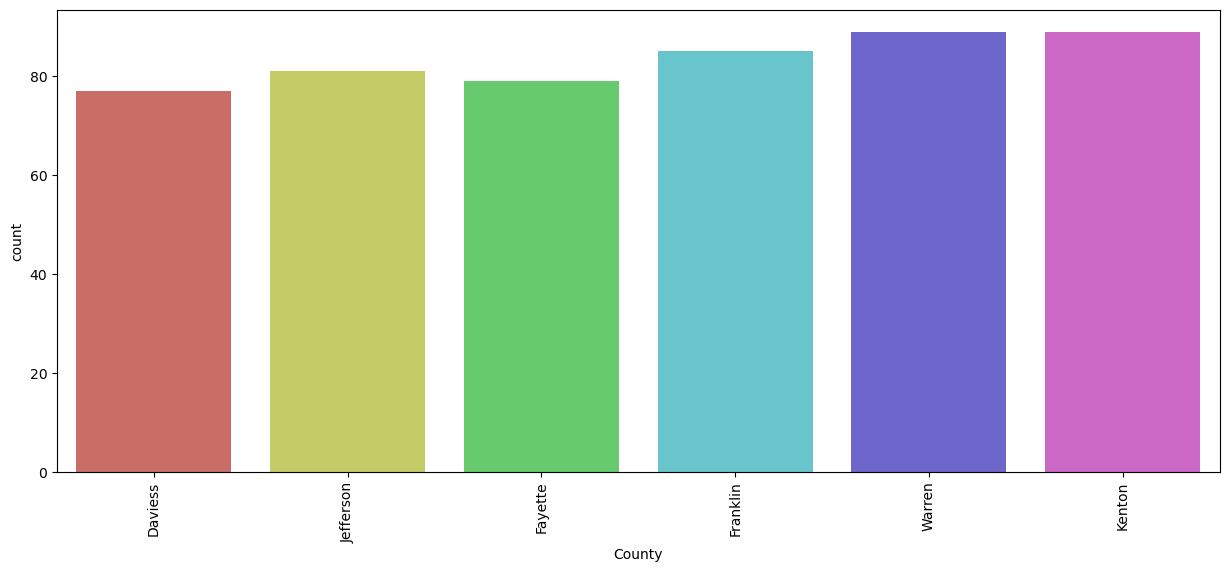

In [167]:
plt.figure(figsize=(15,6))
sn.countplot(survey_data['County'], data = survey_data,
 palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

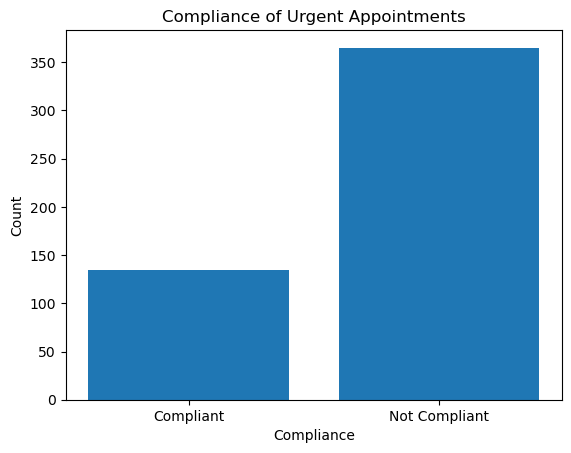

In [193]:
# Count the number of compliant and not compliant appointments by county
compliance_counts = survey_data.groupby(['County', 'Urg_Appt_Status'])['Urg_Appt_Status'].count().unstack()

# Count the number of compliant and not compliant appointments
compliant_counts = survey_data['Urg_Appt_Status'].value_counts()
noncompliant_counts = survey_data['Urg_Appt_Status'].value_counts()

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(['Compliant', 'Not Compliant'], [compliant_counts['Compliant'], noncompliant_counts['Not Compliant']])

# Set the chart title and axis labels
ax.set_title('Compliance of Urgent Appointments')
ax.set_xlabel('Compliance')
ax.set_ylabel('Count')

# Show the plot
plt.show()


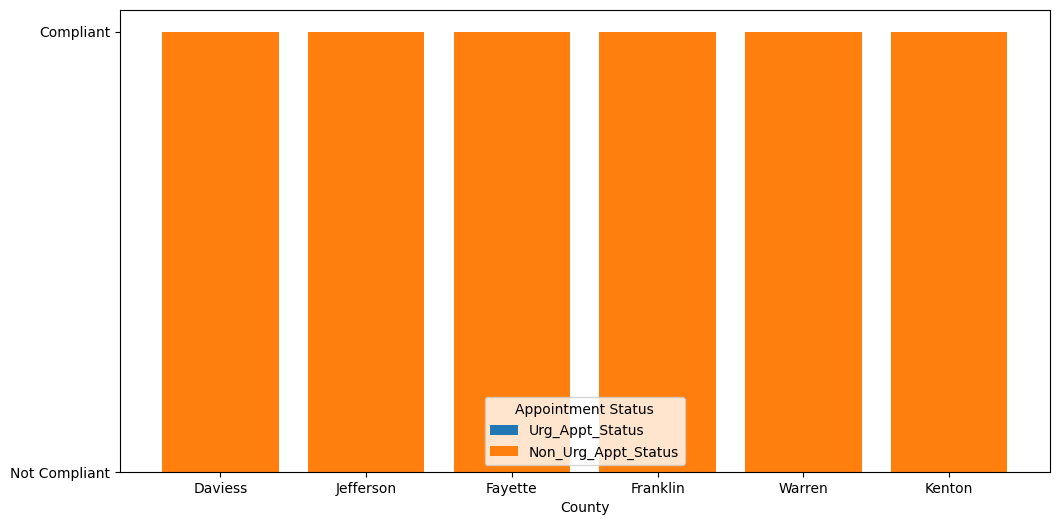

In [185]:
plt.figure(figsize = (12,6))
plt.bar(survey_data['County'], survey_data['Urg_Appt_Status'], label='Urg_Appt_Status')
plt.bar(survey_data['County'], survey_data['Non_Urg_Appt_Status'], label='Non_Urg_Appt_Status')
plt.xlabel('County')
plt.legend(title='Appointment Status')
plt.show()

<Figure size 1200x1200 with 0 Axes>

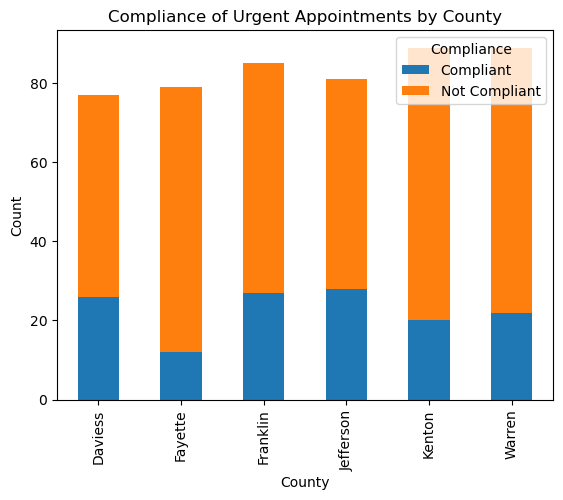

In [176]:
## Check if we can change this into percentage.

plt.figure(figsize = (12,12))
# Count the number of compliant and not compliant appointments by county
compliance_counts = survey_data.groupby(['County', 'Urg_Appt_Status'])['Urg_Appt_Status'].count().unstack()

# Create the stacked bar chart
compliance_counts.plot(kind='bar', stacked=True)

# Set the chart title and axis labels
plt.title('Compliance of Urgent Appointments by County')
plt.xlabel('County')
plt.ylabel('Count')
plt.legend(title='Compliance', loc='upper right')

# Show the plot
plt.show()

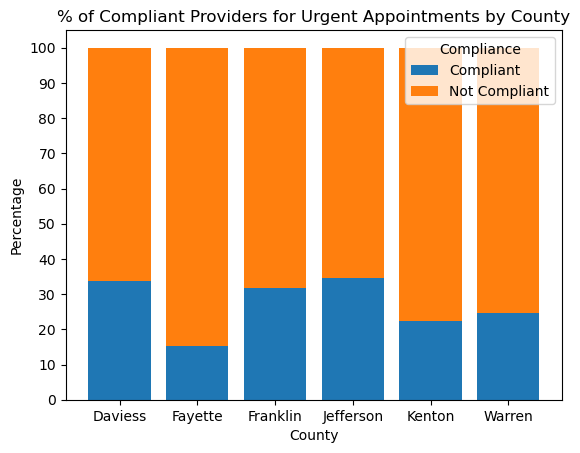

In [191]:
# Group the data by county and compliance status, and calculate the counts
grouped = survey_data.groupby(['County', 'Urg_Appt_Status']).size().reset_index(name='Count')

# Pivot the data to create columns for compliant and not compliant counts
pivoted = grouped.pivot(index='County', columns='Urg_Appt_Status', values='Count')

# Calculate the percentage of appointments that are compliant for each county
pivoted['Compliant_Percentage'] = pivoted['Compliant'] / (pivoted['Compliant'] + pivoted['Not Compliant']) * 100
pivoted['Not_Compliant_Percentage'] = pivoted['Not Compliant'] / (pivoted['Compliant'] + pivoted['Not Compliant']) * 100

# Create the bar chart
fig, ax = plt.subplots()
ax.bar(pivoted.index, pivoted['Compliant_Percentage'], label='Compliant')
ax.bar(pivoted.index, pivoted['Not_Compliant_Percentage'], bottom=pivoted['Compliant_Percentage'], label='Not Compliant')

# Set the chart title and axis labels
ax.set_title('% of Compliant Providers for Urgent Appointments by County')
ax.set_xlabel('County')
ax.set_ylabel('Percentage')
ax.set_yticks(range(0, 101, 10))

# Add legend
ax.legend(title='Compliance')

# Show the plot
plt.show()


<Figure size 1200x600 with 0 Axes>

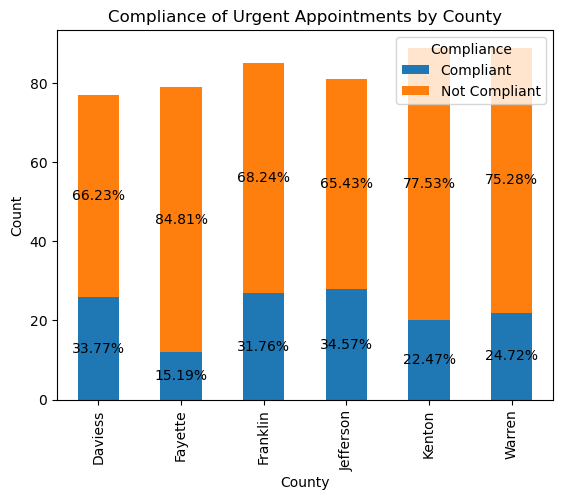

In [178]:
plt.figure(figsize=(12,6))

# Count the number of compliant and not compliant appointments by county
compliance_counts = survey_data.groupby(['County', 'Urg_Appt_Status'])['Urg_Appt_Status'].count().unstack()

# Calculate the percentage of compliant and not compliant appointments by county
compliance_percentages = compliance_counts.apply(lambda x: round(x / x.sum() * 100, 2), axis=1)

# Create the stacked bar chart
compliance_counts.plot(kind='bar', stacked=True)

# Add percentage labels to the bars
for i in range(len(compliance_counts)):
    x_offset = 0
    for j in range(len(compliance_counts.columns)):
        plt.annotate(str(compliance_percentages.iloc[i, j]) + '%', xy=(i, compliance_counts.iloc[i, j] / 2 + x_offset),
                     ha='center', va='center')
        x_offset += compliance_counts.iloc[i, j]

# Set the chart title and axis labels
plt.title('Compliance of Urgent Appointments by County')
plt.xlabel('County')
plt.ylabel('Count')
plt.legend(title='Compliance', loc='upper right')

# Set the x-axis tick labels to the county names
plt.xticks(range(len(compliance_counts.index)), compliance_counts.index)

# Show the plot
plt.show()
